In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

In [3]:
#onlyfiles is a list of file names
onlyfiles = [f for f in listdir('/raid/yifan/to_Yifan_VIC/VIC_output/access1-0_rcp85_r1i1p1') \
             if isfile(join(r"/raid/yifan/to_Yifan_VIC/VIC_output/access1-0_rcp85_r1i1p1", f))]

In [6]:
dirnames

['access1-0_rcp85_r1i1p1',
 'bcc-csm1-1-m_rcp85_r1i1p1',
 'canesm2_rcp85_r1i1p1',
 'ccsm4_rcp85_r1i1p1',
 'cesm1-bgc_rcp85_r1i1p1']

In [5]:
dirnames = listdir('/raid/yifan/to_Yifan_VIC/VIC_output')

0


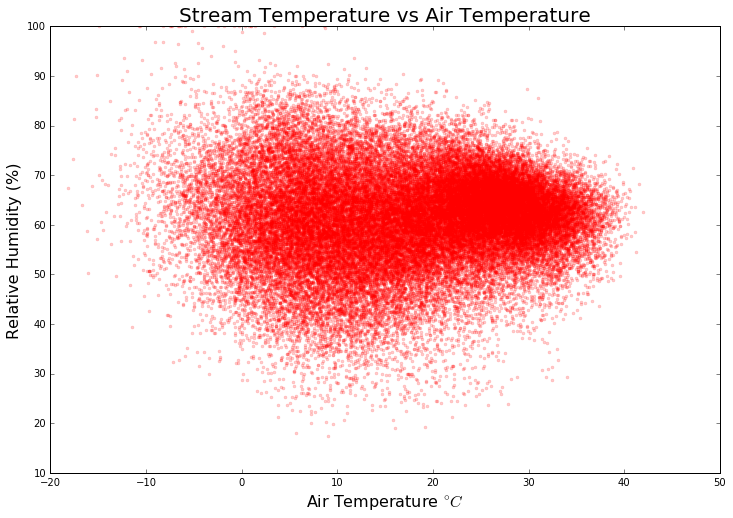

In [8]:
plt.figure(figsize=(12,8))
plt.ylabel(r"Relative Humidity (%)",fontsize=16)
plt.xlabel(r"Air Temperature $^{\circ}C$",fontsize=16)
plt.title('Stream Temperature vs Air Temperature',fontsize=20)
#for i in range(len(onlyfiles)):
for i in [0]:
    filename = '/raid/yifan/to_Yifan_VIC/VIC_output/access1-0_rcp85_r1i1p1/'+onlyfiles[i]
    A = pd.read_csv(filename,sep='\t',header=None,names=['Precipitation','Specific_humidity','Relative_Humidity','Air_Temperature','Air_Pressure(kPa)'])
    plt.plot(A['Air_Temperature'],A['Relative_Humidity'],'r.',alpha=0.2)
    print(i)

In [10]:
data_list = []
#for j in range(len(dirnames)):
#    for i in range(len(onlyfiles)):
for j in [0]:
    for i in [0]:
        filename = '/raid/yifan/to_Yifan_VIC/VIC_output/'+dirnames[j]+'/'+onlyfiles[i]
        data = pd.read_csv(filename,sep='\t',header=None,usecols=[2,3,4],names=['Relative_Humidity','Air_Temperature','Air_Pressure(kPa)'])
        data_list.append(data)
        print(j,i)

0 0


In [11]:
data_list

[       Relative_Humidity  Air_Temperature  Air_Pressure(kPa)
 0                63.8064           0.8387            97.1612
 1                59.9484          -0.8411            97.1361
 2                66.0974           1.5055            97.1711
 3                65.9358          -0.7921            97.1368
 4                72.3928           1.0809            97.1648
 5                68.0895           5.9596            97.2359
 6                65.9966           1.1448            97.1657
 7                72.8945           0.5801            97.1573
 8                74.2826          -0.2761            97.1446
 9                73.3446          -3.2072            97.1002
 10               58.9849          -1.1980            97.1307
 11               49.9175           5.3311            97.2268
 12               55.6261           6.5880            97.2448
 13               63.8517           9.7056            97.2888
 14               66.2809           4.4191            97.2137
 15     

In [56]:
GCM_access = pd.concat(data_list)

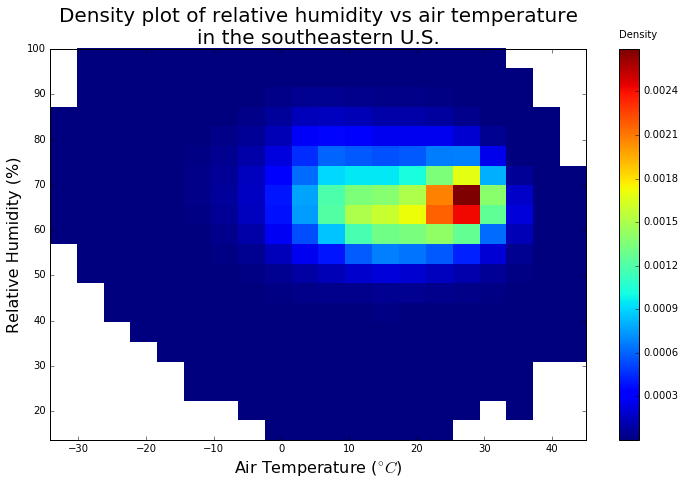

In [112]:
plt.figure(figsize=(12,7))
plt.ylabel('Relative Humidity (%)',fontsize=16)
plt.xlabel(r"Air Temperature ($^{\circ}C$)",fontsize=16)
plt.xlim(-35,45)
plt.ylim(10,100)
plt.title('Density plot of relative humidity vs air temperature\nin the southeastern U.S.', fontsize=20)
B = plt.hist2d(GCM_access['Air_Temperature'],GCM_access['Relative_Humidity'],bins=[20,20],normed=True,cmin=1e-10)
cbar = plt.colorbar()
cbar.set_label('Density',labelpad=-40, y=1.05,rotation=360)

In [73]:
nn=20
mm=20
X = np.linspace(np.min(GCM_access['Air_Temperature']),np.max(GCM_access['Air_Temperature']),nn+1)
X = X[0:-1]+(np.max(GCM_access['Air_Temperature'])-np.min(GCM_access['Air_Temperature']))/(nn+1)
Y = np.linspace(np.min(GCM_access['Relative_Humidity']),np.max(GCM_access['Relative_Humidity']),mm+1)
Y = Y[0:-1]+(np.max(GCM_access['Relative_Humidity'])-np.min(GCM_access['Relative_Humidity']))/(mm+1)
Y,X = np.meshgrid(Y,X)

In [111]:
min_temp = np.min(GCM_access['Air_Temperature'])
max_temp = np.max(GCM_access['Air_Temperature'])
min_humidity = np.min(GCM_access['Relative_Humidity'])
max_humidity = np.max(GCM_access['Relative_Humidity'])

In [114]:
min_tempemp

-34.135800000000003

In [135]:
levels = [0.000135,0.0006,0.0012,0.0018,0.0024]
C = np.nan_to_num(B[0])
number_sum = np.sum(C)
labels = []
for i in range(len(levels)):
    number_of_point = np.sum(C[np.where(C>levels[i])])
    percentage = number_of_point/number_sum
    string = str(round(percentage*100,1))+'%'
    labels.append(string)
print(labels)

['95.2%', '76.2%', '52.4%', '16.0%', '8.7%']


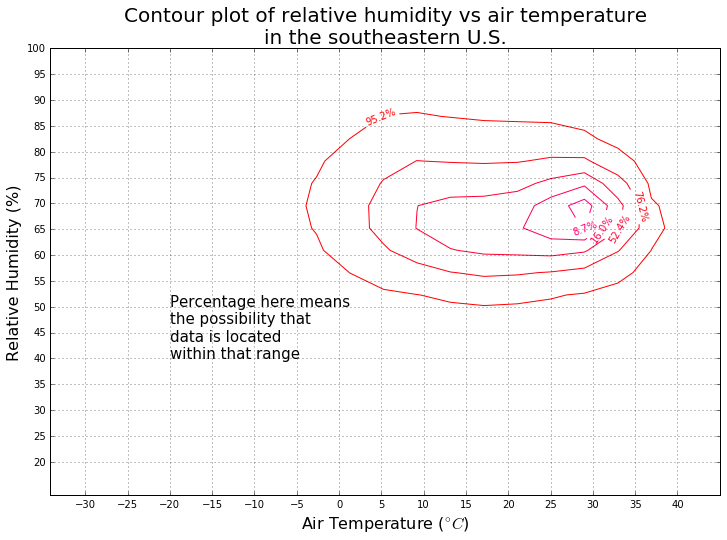

In [139]:
from matplotlib.colors import Colormap
import scipy.ndimage as ndimage
fig = plt.figure(figsize=(12,8))
plt.ylabel(r"Relative Humidity (%)",fontsize=16)
plt.xlabel(r"Air Temperature ($^{\circ}C$)",fontsize=16)
plt.title('Contour plot of relative humidity vs air temperature\nin the southeastern U.S.', fontsize=20)
#Z2 = ndimage.gaussian_filter(A1[0], sigma=1.0, order=0)

CS = plt.contour(X, Y, B[0],levels=levels,colors=('#ff0000',  '#ff0011','#ff0033','#ff0055', '#ff0077','#ff0088'))
#plt.clabel(CS, inline =2, fontsize=8,fmt='%1.4f')
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

fmt = {}
strs = labels
for l, s in zip(CS.levels, strs):
    fmt[l] = s

plt.clabel(CS, CS.levels[::1], inline=True, fmt=fmt, fontsize=10)
plt.xlim(min_temp,max_temp)
plt.ylim(min_humidity,max_humidity)

#plt.legend(handles=[f2m],loc='upper left')
plt.text(x=-20,y=40,s='Percentage here means\nthe possibility that\ndata is located\nwithin that range',fontsize=15)
ax = fig.gca()
ax.set_xticks(np.arange(-30,45,5))
ax.set_yticks(np.arange(20,105,5))
plt.grid()
plt.show()

# Air pressure vs Air temperature

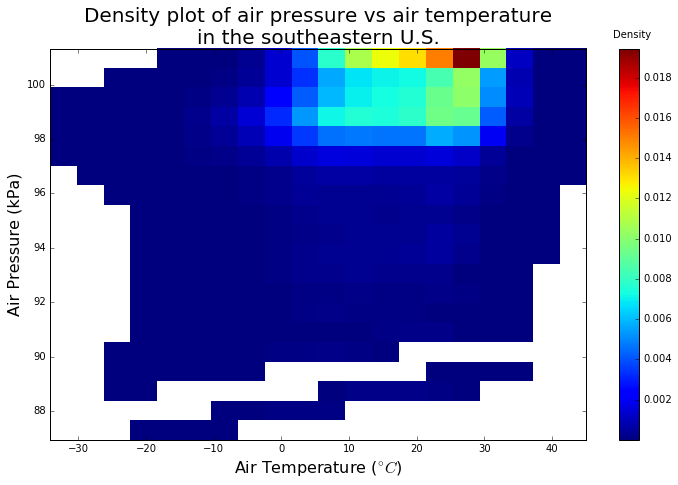

In [140]:
plt.figure(figsize=(12,7))
plt.ylabel('Air Pressure (kPa)',fontsize=16)
plt.xlabel(r"Air Temperature ($^{\circ}C$)",fontsize=16)
plt.xlim(-35,45)
plt.ylim(85,105)
plt.title('Density plot of air pressure vs air temperature\nin the southeastern U.S.', fontsize=20)
AT = plt.hist2d(GCM_access['Air_Temperature'],GCM_access['Air_Pressure(kPa)'],bins=[20,20],normed=True,cmin=1e-10)
cbar = plt.colorbar()
cbar.set_label('Density',labelpad=-40, y=1.05,rotation=360)

In [99]:
nn=20
mm=20
X1 = np.linspace(np.min(GCM_access['Air_Temperature']),np.max(GCM_access['Air_Temperature']),nn+1)
X1 = X1[0:-1]+(np.max(GCM_access['Air_Temperature'])-np.min(GCM_access['Air_Temperature']))/(nn+1)
Y1 = np.linspace(np.min(GCM_access['Air_Pressure(kPa)']),np.max(GCM_access['Air_Pressure(kPa)']),mm+1)
Y1 = Y1[0:-1]+(np.max(GCM_access['Air_Pressure(kPa)'])-np.min(GCM_access['Air_Pressure(kPa)']))/(mm+1)
Y1,X1 = np.meshgrid(Y1,X1)

In [121]:
min_pressure = np.min(GCM_access['Air_Pressure(kPa)'])
max_pressure = np.max(GCM_access['Air_Pressure(kPa)'])

In [122]:
levels = [0.0004,0.004,0.008,0.012,0.016,0.02]
D = np.nan_to_num(AT[0])
number_sum = np.sum(D)
labels = []
for i in range(len(levels)):
    number_of_point = np.sum(D[np.where(D>levels[i])])
    percentage = number_of_point/number_sum
    string = str(round(percentage*100,1))+'%'
    labels.append(string)
print(labels)

['95.1%', '81.9%', '39.2%', '17.0%', '5.5%', '0.0%']


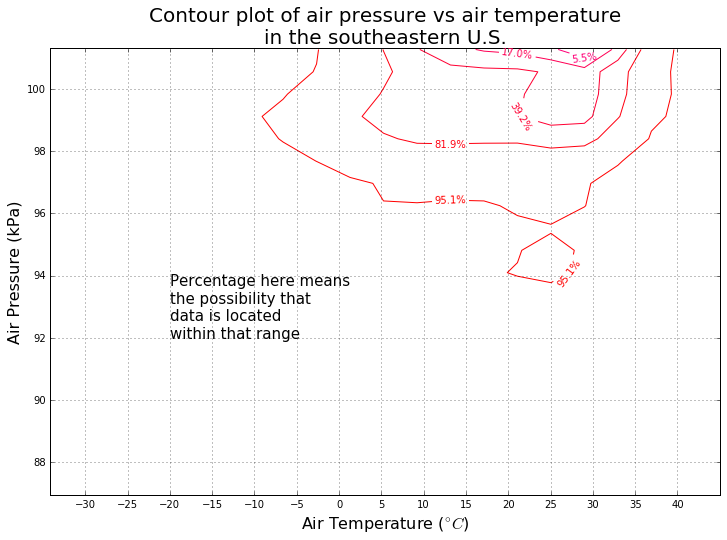

In [132]:
from matplotlib.colors import Colormap
import scipy.ndimage as ndimage
fig = plt.figure(figsize=(12,8))
plt.ylabel('Air Pressure (kPa)',fontsize=16)
plt.xlabel(r"Air Temperature ($^{\circ}C$)",fontsize=16)
plt.title('Contour plot of air pressure vs air temperature\nin the southeastern U.S.', fontsize=20)
#Z2 = ndimage.gaussian_filter(A1[0], sigma=1.0, order=0)

CS = plt.contour(X1, Y1, AT[0],levels=levels,colors=('#ff0000', '#ff0011','#ff0033','#ff0055', '#ff0077','#ff0099'))
#plt.clabel(CS, inline =2, fontsize=8,fmt='%1.4f')
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])

fmt = {}
strs = labels
for l, s in zip(CS.levels, strs):
    fmt[l] = s

plt.clabel(CS, CS.levels[::1], inline=True, fmt=fmt, fontsize=10)
plt.xlim(min_temp,max_temp)
plt.ylim(min_pressure,max_pressure)

#plt.legend(handles=[f2m],loc='upper left')
plt.text(x=-20,y=92,s='Percentage here means\nthe possibility that\ndata is located\nwithin that range',fontsize=15)
ax = fig.gca()
ax.set_xticks(np.arange(-30,45,5))
ax.set_yticks(np.arange(88,102,2))
plt.grid()
plt.show()

In [106]:
1e-10

1e-10